In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [249]:
df= pd.read_csv('Hotel Reservations.csv')
pd.set_option('display.max_columns', None)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [250]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [251]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [252]:
def grab_col_names(dataframe,cat_th=10,car_th=30):

    # cat_cols , cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ['category','object','bool']]
    num_but_cat = [col for col in df.columns if df[col].nunique() <10 and (df[col].dtypes) in ['int64','float64']]
    cat_but_car = [col for col in df.columns if
                   df[col].nunique()>20 and str(df[col].dtypes) in ['category','object']]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]


    num_cols = [col for col in df.columns if df[col].dtypes in ['int','float']]
    num_cols = [col for col in num_cols if col not in cat_cols]


    print(f'Observations : {dataframe.shape[0]}')
    print(f'Variables :{dataframe.shape[1]}')
    print(f'cat_cols : {len(cat_cols)}')
    print(f'num_cols : {len(num_cols)}')
    print(f'cat_but_car : {len(cat_but_car)}')
    print(f'num_but_cat : {len(num_but_cat)}')

    return cat_cols ,num_cols ,cat_but_car

In [253]:
grab_col_names(df)

Observations : 36275
Variables :19
cat_cols : 12
num_cols : 6
cat_but_car : 1
num_but_cat : 8


(['type_of_meal_plan',
  'room_type_reserved',
  'market_segment_type',
  'booking_status',
  'no_of_adults',
  'no_of_children',
  'no_of_weekend_nights',
  'required_car_parking_space',
  'arrival_year',
  'repeated_guest',
  'no_of_previous_cancellations',
  'no_of_special_requests'],
 ['no_of_week_nights',
  'lead_time',
  'arrival_month',
  'arrival_date',
  'no_of_previous_bookings_not_canceled',
  'avg_price_per_room'],
 ['Booking_ID'])

In [254]:
df.duplicated().any()

False

In [255]:
df_numerical=df.select_dtypes(exclude='object')
df_numerical.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0


In [256]:
len(df_numerical.columns)

14

In [257]:
df.describe(include= "O").columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')

In [258]:
colss_cat = ['type_of_meal_plan','room_type_reserved','market_segment_type']
colss_numeric = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [259]:
uniq= pd.DataFrame([len(df[df.columns[i]].unique()) for i in range(0,19)], index= df.columns, columns= ['Total Unique'])
uniq

,Total Unique
Booking_ID,36275
no_of_adults,5
no_of_children,6
no_of_weekend_nights,8
no_of_week_nights,18
type_of_meal_plan,4
required_car_parking_space,2
room_type_reserved,7
lead_time,352
arrival_year,2


**ANALISIS DULU**

<ipython-input-260-a31840d91b55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap= "Greens")


<Axes: >

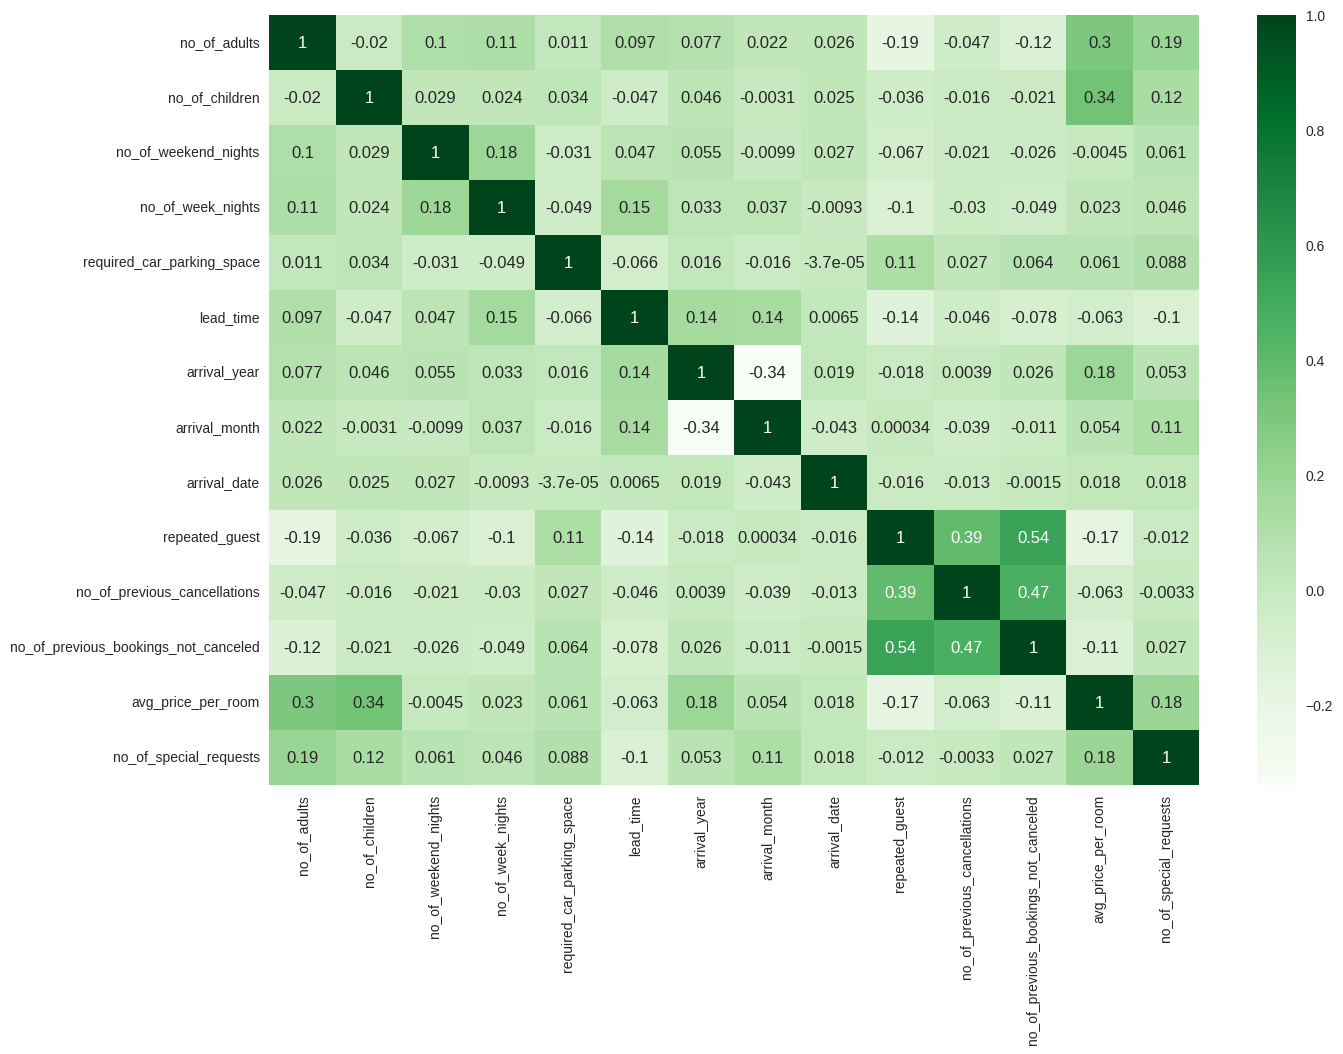

In [260]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True, cmap= "Greens")

In [261]:
numerical_col=[]
for c in df_numerical:
    numerical_col.append(c)

In [262]:
booking= {'Not_Canceled': 0 , 'Canceled': 1}
df['booking_status']= df['booking_status'].map(booking)

In [263]:
df=df.drop('Booking_ID', axis= 1 )

In [264]:
category= ['type_of_meal_plan', 'room_type_reserved',
       'market_segment_type']

**SPLIT DATA**

In [265]:
X=df.drop('booking_status',axis=True)
y=df['booking_status']

**Data Preprocessing**

In [266]:
num= X.select_dtypes(include= 'number')

In [267]:
vif= pd.DataFrame()
vif["variables"] = num.columns
vif["VIF"] = [variance_inflation_factor(num.values, i).round(2) for i in range(num.shape[1])]
vif

,variables,VIF
0,no_of_adults,16.45
1,no_of_children,1.24
2,no_of_weekend_nights,1.96
3,no_of_week_nights,3.68
4,required_car_parking_space,1.06
5,lead_time,2.17
6,arrival_year,29.45
7,arrival_month,7.16
8,arrival_date,4.20
9,repeated_guest,1.60


In [268]:
X[category]=X[category].apply(LabelEncoder().fit_transform)

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0


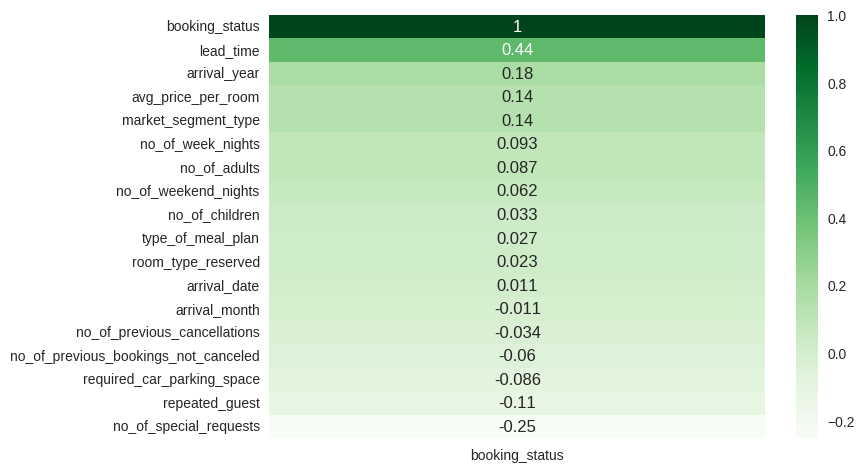

In [269]:
all= X.join(y)
all
sns.heatmap(all.corr()[['booking_status']].sort_values(by= ['booking_status'], ascending= False), annot = True, cmap= 'Greens');

In [270]:
X= X.drop(['arrival_date', 'arrival_month'], axis= 1)

**Data Standarization**

In [271]:
scaler= StandardScaler()

In [272]:
scaler.fit(X)

StandardScaler()

In [273]:
standarized_data= scaler.transform(X)

In [274]:
X= standarized_data
y= df['booking_status']

**Drop Low Correlation**

**LOGISTIC REGRESSION**

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [276]:
print(X.shape, X_train.shape, X_test.shape)

(36275, 15) (27206, 15) (9069, 15)


In [277]:
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)

LogisticRegression()

In [278]:
y_pred = logmodel.predict(X_test)

In [279]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.802514,0.672877,0.752144,0.608724


**Choose Best Pipeline**

In [280]:
#from tpot import TPOTClassifier
#tpot = TPOTClassifier(generations=7, population_size=7, verbosity=2, offspring_size=10, scoring='accuracy', cv=5)
#tpot.fit(X_train, y_train)
#print(tpot.score(X_test, y_test))

**HYPER PARAMETERTUNNING**

In [281]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [282]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  gini
Score:  0.8759832261631761


In [283]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

0.882346454956445

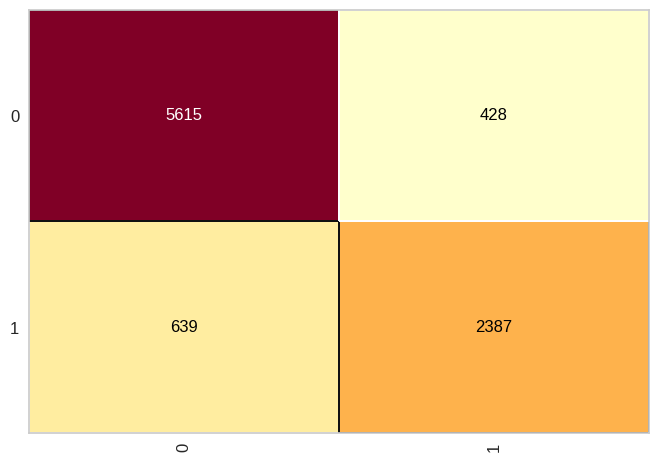

In [284]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [285]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6043
           1       0.75      0.61      0.67      3026

    accuracy                           0.80      9069
   macro avg       0.79      0.75      0.77      9069
weighted avg       0.80      0.80      0.80      9069



In [288]:
input_data= [2, 0, 2, 3, 3, 0, 0, 5, 2018, 4, 0, 0, 0, 106.68, 1]
input_data_as_array= np.array(input_data)
reshape= input_data_as_array.reshape(1,-1)
std_scaler= scaler.transform(reshape)
print(std_scaler)
prediction= extra_trees.predict(std_scaler)
print(prediction)

[[ 0.29889263 -0.26147045  1.36599262  0.56397175  2.37030377 -0.17881927
  -0.50641126 -0.93370069  0.46784298  0.65669226 -0.16220995 -0.06339327
  -0.08745646  0.09280591  0.48376045]]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [289]:
if prediction[0]==0:
  print('Not Canceled')
else:
  print('Canceled')

Not Canceled


**Save The Model**

In [290]:
import pickle

In [292]:
filename= "hotel_prediction.sav"
pickle.dump(extra_trees, open(filename, 'wb'))